Volatility is one of the most important concepts in options


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
# For making attractive and informative statistical graph
plt.style.use('seaborn-darkgrid')

## Get data

The data is collected from yahoo finance on daily timeframes

In [5]:
btc = yf.download(tickers="BTC-USD", interval="1d")
btc

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2021-11-25,57165.417969,59367.968750,57146.683594,57274.679688,57274.679688,34284016248
2021-11-26,58960.285156,59183.480469,53569.765625,53569.765625,53569.765625,41810748221
2021-11-27,53736.429688,55329.257812,53668.355469,54815.078125,54815.078125,30560857714


# Calculate the historical volatility

First we get the logaritmic returns using the closing price of the day and get the 20 day historical volatility by using the standard deviation. 

In [7]:
btc["Log Returns"] = np.log(btc["Close"]/btc["Close"].shift(1))
btc["20 day Historical Volatility"] = 100*btc["Log Returns"].rolling(window=20).std()

# Plot the volatility

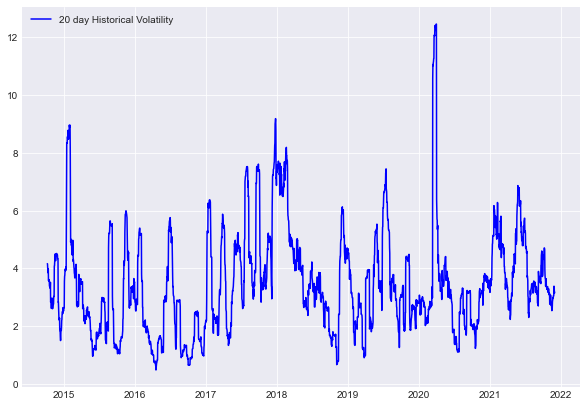

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(btc["20 day Historical Volatility"], color = "b", label = "20 day Historical Volatility")
plt.legend(loc="best")
plt.show()

# Test strategies on Options

## Bull call spread

This strategy set a long and short position on different strike prices with the same experiation day. That way you limit your earns but also limit your loss. 


The strategy is buy the BTC premium with a value of 9k on expiration day on december 31 2021 with strike price of 50k. We belive that BTC will reach up to 70K by the end of year. In that regard, we short the 70K strike price at a premium of 2k on the same expiration data. 

Below we show a picture on how the options looks at november 30 2021



![title](option_price.png)


In [1]:
# Define the call payoff function
def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

# Define parameters
To evaluate the strategy we define a range of values that goes from -50% to 100%
This is calculated from 0.5 to 2.0


In [5]:
# BTC spot price
spot_price = 58000

# long call
strike_price_long_call = 50000
premium_long_call = 9000

# short call
strike_price_short_call = 70000
premium_short_call = 2000

# Stock price range at expiration of the call
sT = np.arange(0.5*spot_price, 2*spot_price, 1000)
sT


array([ 29000.,  30000.,  31000.,  32000.,  33000.,  34000.,  35000.,
        36000.,  37000.,  38000.,  39000.,  40000.,  41000.,  42000.,
        43000.,  44000.,  45000.,  46000.,  47000.,  48000.,  49000.,
        50000.,  51000.,  52000.,  53000.,  54000.,  55000.,  56000.,
        57000.,  58000.,  59000.,  60000.,  61000.,  62000.,  63000.,
        64000.,  65000.,  66000.,  67000.,  68000.,  69000.,  70000.,
        71000.,  72000.,  73000.,  74000.,  75000.,  76000.,  77000.,
        78000.,  79000.,  80000.,  81000.,  82000.,  83000.,  84000.,
        85000.,  86000.,  87000.,  88000.,  89000.,  90000.,  91000.,
        92000.,  93000.,  94000.,  95000.,  96000.,  97000.,  98000.,
        99000., 100000., 101000., 102000., 103000., 104000., 105000.,
       106000., 107000., 108000., 109000., 110000., 111000., 112000.,
       113000., 114000., 115000.])

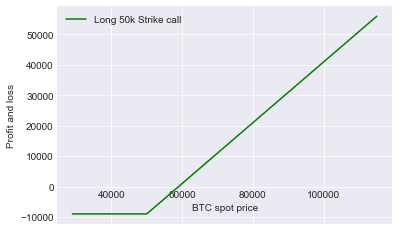

In [6]:
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
# plot
ax = plt.subplot()
ax.spines["bottom"].set_position("zero")
ax.plot(sT, payoff_long_call, label = "Long 50k Strike call", color = "g")
plt.xlabel("BTC spot price")
plt.ylabel("Profit and loss")
plt.legend()
plt.show()

The graph shows the long posibilities given that most prediction range BTC prices up to 100K which will give a profit at expiration date of 50k. 

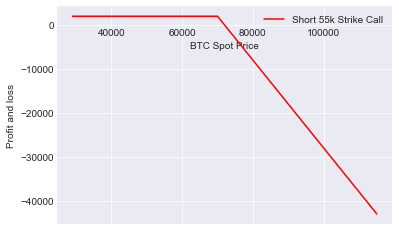

In [7]:
payoff_short_call = call_payoff(
    sT, strike_price_short_call, premium_short_call) * -1.0

# Plot
ax = plt.subplot()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_short_call, label='Short 55k Strike Call', color='r')
plt.xlabel('BTC Spot Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

The graph shows the profit and loss by shorting BTC options with strike price at 70k given that the downtrend is likely to go back to 25K while the uptrend it is likely to go up to 100k.

Max Profit: 13000.0
Max Loss: -7000.0


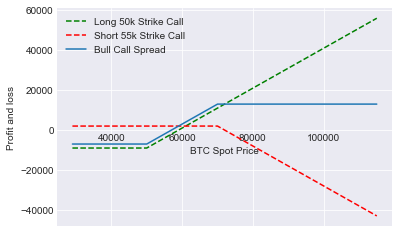

In [8]:
payoff_bull_call_spread = payoff_long_call + payoff_short_call

print("Max Profit:", max(payoff_bull_call_spread))
print("Max Loss:", min(payoff_bull_call_spread))

# Plot
ax = plt.subplot()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_call, '--', label='Long 50k Strike Call', color='g')
ax.plot(sT, payoff_short_call, '--', label='Short 55k Strike Call ', color='r')
ax.plot(sT, payoff_bull_call_spread, label='Bull Call Spread')
plt.xlabel('BTC Spot Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

Using this strategy we have a define risk. We spent 11K on the long and short options, the maximun amount of profit that we can get is 13K while the maximun loss is 7K which sounds as a reasonable risk to take in these strategy. The object of this strategy is to benefit from small positive movements. 

## Bear put spread
On the second strategy we belive that BTC price will have small negative movements

We build a payoff graph for long 50k strike and short 45k strike put on BTC

In [7]:
def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - premium, 0) - premium

## Define parameters

In [11]:
spot_price = 59000
strike_price_long_put = 50000
premium_long_put = 1500

strike_price_short_put = 45000
premium_short_put = 680

# BTC price range at the expiration of the put is the ``sT`` which is already define
# Stock price range at expiration of the call
sT = np.arange(0.5*spot_price, 2*spot_price, 1000)

## Long 50K strike put payoff

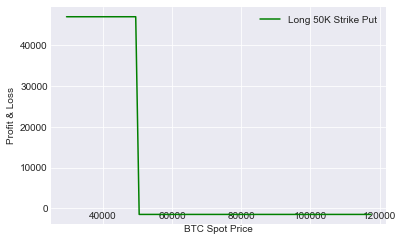

In [12]:
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
# plot
ax = plt.subplot()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_put, label="Long 50K Strike Put", color = "g")
plt.xlabel("BTC Spot Price")
plt.ylabel("Profit & Loss")
plt.legend()
plt.show()

## Short 45K strike put payoff

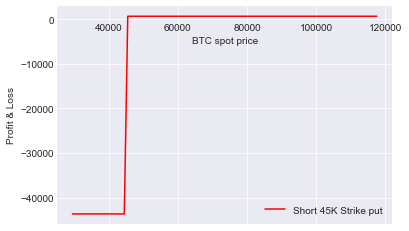

In [15]:
payoff_short_put = put_payoff(sT, strike_price_short_put, premium_short_put) * -1

ax = plt.subplot()
ax.spines["bottom"].set_position("zero")
ax.plot(sT, payoff_short_put, label = "Short 45K Strike put", color = "r")
plt.xlabel("BTC spot price")
plt.ylabel("Profit & Loss")
plt.legend()
plt.show()

## Bear Put spread payoff

Max Profit: 47680
Max Loss: -820


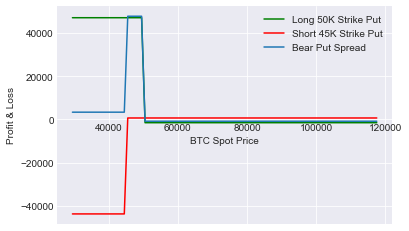

In [17]:
payoff_bear_put_spread = payoff_long_put + payoff_short_put

print("Max Profit:", max(payoff_bear_put_spread))
print("Max Loss:", min(payoff_bear_put_spread))

ax = plt.subplot()
ax.spines["bottom"].set_position("zero")
ax.plot(sT, payoff_long_put, label = "Long 50K Strike Put", color = "g")
ax.plot(sT, payoff_short_put, label = "Short 45K Strike Put", color = "r")
ax.plot(sT, payoff_bear_put_spread, label = "Bear Put Spread")
plt.xlabel("BTC Spot Price")
plt.ylabel("Profit & Loss")
plt.legend()
plt.show()

The results of the analysis suggest a maximun profit on this strategy of $47,680 with a maximun loss of 820 which seems a better investment in terms of risk that call positions. 